In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 数据预处理：

In [2]:
data = pd.read_csv('./dataset/leaf/train.csv')

In [3]:
data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [5]:
data.species.unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [6]:
len(data.species.unique())

99

In [7]:
labels = pd.factorize(data.pop('species'))

In [8]:
y = labels[0]

In [9]:
_ = data.pop('id')

In [10]:
x = data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_x, test_x, train_y, test_y = train_test_split(x, y)

In [13]:
train_x.shape, test_x.shape

((742, 192), (248, 192))

In [14]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

In [15]:
train_x_norm = (train_x - mean)/std

In [16]:
test_x_norm = (test_x - mean)/std

In [17]:
train_x_norm = np.expand_dims(train_x_norm, -1)

In [18]:
train_x_norm.shape

(742, 192, 1)

In [19]:
test_x_norm = np.expand_dims(test_x_norm, -1)

In [20]:
test_x_norm.shape

(248, 192, 1)

# 模型搭建：初级模型

In [110]:
model = keras.Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', padding='same', input_shape=train_x_norm.shape[1:]))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 7, activation='relu', padding='same'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(99, activation='softmax'))

In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 192, 32)           256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 64, 32)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 64, 32)            7200      
_________________________________________________________________
global_average_pooling1d_3 ( (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 99)                3267      
Total params: 10,723
Trainable params: 10,723
Non-trainable params: 0
_________________________________________________________________


In [112]:
train_x_norm.shape

(742, 192, 1)

In [113]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [114]:
history = model.fit(train_x_norm, train_y, epochs=1000, batch_size=128, validation_data=(test_x_norm, test_y))

Train on 742 samples, validate on 248 samples
Epoch 1/1000
742/742 [==============================] - 1s 2ms/step - loss: 4.6008 - acc: 0.0067 - val_loss: 4.5969 - val_acc: 0.0040
Epoch 2/1000
742/742 [==============================] - 0s 91us/step - loss: 4.5876 - acc: 0.0135 - val_loss: 4.5945 - val_acc: 0.0323
Epoch 3/1000
742/742 [==============================] - 0s 92us/step - loss: 4.5768 - acc: 0.0202 - val_loss: 4.5885 - val_acc: 0.0282
Epoch 4/1000
742/742 [==============================] - 0s 85us/step - loss: 4.5639 - acc: 0.0202 - val_loss: 4.5799 - val_acc: 0.0202
Epoch 5/1000
742/742 [==============================] - 0s 92us/step - loss: 4.5473 - acc: 0.0202 - val_loss: 4.5684 - val_acc: 0.0202
Epoch 6/1000
742/742 [==============================] - 0s 90us/step - loss: 4.5245 - acc: 0.0202 - val_loss: 4.5522 - val_acc: 0.0202
Epoch 7/1000
742/742 [==============================] - 0s 97us/step - loss: 4.4956 - acc: 0.0202 - val_loss: 4.5299 - val_acc: 0.0202
Epoch 8/10

Epoch 61/1000
742/742 [==============================] - 0s 89us/step - loss: 3.1252 - acc: 0.1725 - val_loss: 3.3256 - val_acc: 0.1129
Epoch 62/1000
742/742 [==============================] - 0s 80us/step - loss: 3.1201 - acc: 0.1658 - val_loss: 3.2875 - val_acc: 0.1290
Epoch 63/1000
742/742 [==============================] - 0s 93us/step - loss: 3.1065 - acc: 0.1563 - val_loss: 3.2743 - val_acc: 0.1371
Epoch 64/1000
742/742 [==============================] - 0s 89us/step - loss: 3.0881 - acc: 0.1752 - val_loss: 3.2775 - val_acc: 0.1452
Epoch 65/1000
742/742 [==============================] - 0s 92us/step - loss: 3.0776 - acc: 0.1914 - val_loss: 3.2854 - val_acc: 0.0887
Epoch 66/1000
742/742 [==============================] - 0s 89us/step - loss: 3.0650 - acc: 0.1712 - val_loss: 3.2521 - val_acc: 0.1169
Epoch 67/1000
742/742 [==============================] - 0s 89us/step - loss: 3.0606 - acc: 0.1698 - val_loss: 3.2544 - val_acc: 0.1048
Epoch 68/1000
742/742 [=========================

742/742 [==============================] - 0s 93us/step - loss: 2.5345 - acc: 0.3221 - val_loss: 2.8804 - val_acc: 0.2016
Epoch 122/1000
742/742 [==============================] - 0s 90us/step - loss: 2.5560 - acc: 0.3019 - val_loss: 2.8511 - val_acc: 0.2581
Epoch 123/1000
742/742 [==============================] - 0s 94us/step - loss: 2.5181 - acc: 0.3248 - val_loss: 2.8445 - val_acc: 0.2581
Epoch 124/1000
742/742 [==============================] - 0s 89us/step - loss: 2.5104 - acc: 0.3113 - val_loss: 2.8833 - val_acc: 0.2298
Epoch 125/1000
742/742 [==============================] - 0s 89us/step - loss: 2.5229 - acc: 0.3369 - val_loss: 2.8409 - val_acc: 0.2621
Epoch 126/1000
742/742 [==============================] - 0s 93us/step - loss: 2.5024 - acc: 0.3248 - val_loss: 2.8532 - val_acc: 0.2339
Epoch 127/1000
742/742 [==============================] - 0s 93us/step - loss: 2.4825 - acc: 0.3154 - val_loss: 2.8307 - val_acc: 0.2379
Epoch 128/1000
742/742 [==============================] 

Epoch 181/1000
742/742 [==============================] - 0s 79us/step - loss: 2.1262 - acc: 0.4232 - val_loss: 2.5492 - val_acc: 0.3105
Epoch 182/1000
742/742 [==============================] - 0s 90us/step - loss: 2.0956 - acc: 0.4313 - val_loss: 2.5536 - val_acc: 0.2702
Epoch 183/1000
742/742 [==============================] - 0s 90us/step - loss: 2.0954 - acc: 0.4380 - val_loss: 2.5873 - val_acc: 0.2984
Epoch 184/1000
742/742 [==============================] - 0s 91us/step - loss: 2.0980 - acc: 0.4447 - val_loss: 2.5355 - val_acc: 0.3266
Epoch 185/1000
742/742 [==============================] - 0s 94us/step - loss: 2.0675 - acc: 0.4663 - val_loss: 2.5333 - val_acc: 0.2984
Epoch 186/1000
742/742 [==============================] - 0s 93us/step - loss: 2.0708 - acc: 0.4420 - val_loss: 2.4789 - val_acc: 0.3065
Epoch 187/1000
742/742 [==============================] - 0s 93us/step - loss: 2.0868 - acc: 0.4191 - val_loss: 2.5355 - val_acc: 0.3185
Epoch 188/1000
742/742 [=================

Epoch 241/1000
742/742 [==============================] - 0s 95us/step - loss: 1.7832 - acc: 0.5121 - val_loss: 2.3012 - val_acc: 0.3710
Epoch 242/1000
742/742 [==============================] - 0s 96us/step - loss: 1.7849 - acc: 0.5256 - val_loss: 2.3190 - val_acc: 0.3669
Epoch 243/1000
742/742 [==============================] - 0s 89us/step - loss: 1.7829 - acc: 0.5189 - val_loss: 2.3063 - val_acc: 0.3145
Epoch 244/1000
742/742 [==============================] - 0s 91us/step - loss: 1.7737 - acc: 0.5296 - val_loss: 2.3356 - val_acc: 0.3669
Epoch 245/1000
742/742 [==============================] - 0s 92us/step - loss: 1.7734 - acc: 0.5135 - val_loss: 2.3435 - val_acc: 0.3508
Epoch 246/1000
742/742 [==============================] - 0s 91us/step - loss: 1.7700 - acc: 0.5270 - val_loss: 2.2673 - val_acc: 0.3952
Epoch 247/1000
742/742 [==============================] - 0s 93us/step - loss: 1.7612 - acc: 0.5445 - val_loss: 2.2626 - val_acc: 0.3911
Epoch 248/1000
742/742 [=================

Epoch 301/1000
742/742 [==============================] - 0s 92us/step - loss: 1.5181 - acc: 0.6186 - val_loss: 2.1766 - val_acc: 0.4355
Epoch 302/1000
742/742 [==============================] - 0s 91us/step - loss: 1.5312 - acc: 0.5849 - val_loss: 2.0506 - val_acc: 0.4435
Epoch 303/1000
742/742 [==============================] - 0s 89us/step - loss: 1.5164 - acc: 0.5970 - val_loss: 2.0897 - val_acc: 0.4435
Epoch 304/1000
742/742 [==============================] - 0s 88us/step - loss: 1.5168 - acc: 0.5970 - val_loss: 2.1170 - val_acc: 0.3992
Epoch 305/1000
742/742 [==============================] - 0s 87us/step - loss: 1.5290 - acc: 0.6038 - val_loss: 2.0939 - val_acc: 0.4073
Epoch 306/1000
742/742 [==============================] - 0s 92us/step - loss: 1.5030 - acc: 0.5849 - val_loss: 2.0641 - val_acc: 0.4758
Epoch 307/1000
742/742 [==============================] - 0s 88us/step - loss: 1.4972 - acc: 0.6186 - val_loss: 2.1445 - val_acc: 0.4597
Epoch 308/1000
742/742 [=================

Epoch 361/1000
742/742 [==============================] - 0s 84us/step - loss: 1.3001 - acc: 0.6482 - val_loss: 1.9621 - val_acc: 0.4677
Epoch 362/1000
742/742 [==============================] - 0s 91us/step - loss: 1.3168 - acc: 0.6456 - val_loss: 1.9750 - val_acc: 0.4798
Epoch 363/1000
742/742 [==============================] - 0s 92us/step - loss: 1.2901 - acc: 0.6469 - val_loss: 1.9569 - val_acc: 0.4234
Epoch 364/1000
742/742 [==============================] - 0s 91us/step - loss: 1.2943 - acc: 0.6563 - val_loss: 1.9743 - val_acc: 0.4597
Epoch 365/1000
742/742 [==============================] - 0s 90us/step - loss: 1.2893 - acc: 0.6752 - val_loss: 1.9424 - val_acc: 0.4758
Epoch 366/1000
742/742 [==============================] - 0s 94us/step - loss: 1.2901 - acc: 0.6671 - val_loss: 1.9543 - val_acc: 0.4677
Epoch 367/1000
742/742 [==============================] - 0s 90us/step - loss: 1.2885 - acc: 0.6550 - val_loss: 1.9478 - val_acc: 0.4879
Epoch 368/1000
742/742 [=================

Epoch 421/1000
742/742 [==============================] - 0s 85us/step - loss: 1.1119 - acc: 0.7183 - val_loss: 1.7737 - val_acc: 0.5040
Epoch 422/1000
742/742 [==============================] - 0s 91us/step - loss: 1.0764 - acc: 0.7197 - val_loss: 1.7805 - val_acc: 0.5000
Epoch 423/1000
742/742 [==============================] - 0s 88us/step - loss: 1.1249 - acc: 0.7075 - val_loss: 1.7948 - val_acc: 0.5121
Epoch 424/1000
742/742 [==============================] - 0s 91us/step - loss: 1.1035 - acc: 0.7129 - val_loss: 1.7301 - val_acc: 0.5242
Epoch 425/1000
742/742 [==============================] - 0s 88us/step - loss: 1.0866 - acc: 0.7143 - val_loss: 1.7054 - val_acc: 0.5323
Epoch 426/1000
742/742 [==============================] - 0s 89us/step - loss: 1.0942 - acc: 0.7143 - val_loss: 1.7501 - val_acc: 0.5121
Epoch 427/1000
742/742 [==============================] - 0s 89us/step - loss: 1.0798 - acc: 0.7049 - val_loss: 1.8149 - val_acc: 0.5161
Epoch 428/1000
742/742 [=================

Epoch 481/1000
742/742 [==============================] - 0s 93us/step - loss: 0.9227 - acc: 0.7574 - val_loss: 1.6034 - val_acc: 0.5968
Epoch 482/1000
742/742 [==============================] - 0s 89us/step - loss: 0.9262 - acc: 0.7588 - val_loss: 1.6734 - val_acc: 0.5202
Epoch 483/1000
742/742 [==============================] - 0s 89us/step - loss: 0.9394 - acc: 0.7507 - val_loss: 1.6139 - val_acc: 0.6008
Epoch 484/1000
742/742 [==============================] - 0s 88us/step - loss: 0.9162 - acc: 0.7749 - val_loss: 1.5317 - val_acc: 0.5685
Epoch 485/1000
742/742 [==============================] - 0s 90us/step - loss: 0.9000 - acc: 0.7803 - val_loss: 1.6174 - val_acc: 0.5363
Epoch 486/1000
742/742 [==============================] - 0s 90us/step - loss: 0.9261 - acc: 0.7480 - val_loss: 1.6036 - val_acc: 0.5645
Epoch 487/1000
742/742 [==============================] - 0s 90us/step - loss: 0.9071 - acc: 0.7601 - val_loss: 1.6308 - val_acc: 0.5121
Epoch 488/1000
742/742 [=================

Epoch 541/1000
742/742 [==============================] - 0s 91us/step - loss: 0.7691 - acc: 0.8059 - val_loss: 1.4541 - val_acc: 0.6371
Epoch 542/1000
742/742 [==============================] - 0s 83us/step - loss: 0.7704 - acc: 0.8005 - val_loss: 1.5526 - val_acc: 0.5847
Epoch 543/1000
742/742 [==============================] - 0s 91us/step - loss: 0.7506 - acc: 0.8059 - val_loss: 1.5028 - val_acc: 0.6008
Epoch 544/1000
742/742 [==============================] - 0s 91us/step - loss: 0.7622 - acc: 0.8086 - val_loss: 1.4565 - val_acc: 0.5806
Epoch 545/1000
742/742 [==============================] - 0s 88us/step - loss: 0.7644 - acc: 0.8086 - val_loss: 1.4898 - val_acc: 0.5766
Epoch 546/1000
742/742 [==============================] - 0s 94us/step - loss: 0.7500 - acc: 0.7992 - val_loss: 1.4641 - val_acc: 0.5645
Epoch 547/1000
742/742 [==============================] - 0s 89us/step - loss: 0.7416 - acc: 0.8208 - val_loss: 1.4874 - val_acc: 0.5927
Epoch 548/1000
742/742 [=================

Epoch 601/1000
742/742 [==============================] - 0s 88us/step - loss: 0.6293 - acc: 0.8410 - val_loss: 1.4004 - val_acc: 0.6452
Epoch 602/1000
742/742 [==============================] - 0s 93us/step - loss: 0.6355 - acc: 0.8396 - val_loss: 1.3296 - val_acc: 0.6532
Epoch 603/1000
742/742 [==============================] - 0s 89us/step - loss: 0.6505 - acc: 0.8100 - val_loss: 1.3908 - val_acc: 0.6290
Epoch 604/1000
742/742 [==============================] - 0s 90us/step - loss: 0.6441 - acc: 0.8437 - val_loss: 1.3042 - val_acc: 0.6734
Epoch 605/1000
742/742 [==============================] - 0s 89us/step - loss: 0.6312 - acc: 0.8383 - val_loss: 1.3032 - val_acc: 0.6331
Epoch 606/1000
742/742 [==============================] - 0s 91us/step - loss: 0.6236 - acc: 0.8450 - val_loss: 1.3665 - val_acc: 0.6411
Epoch 607/1000
742/742 [==============================] - 0s 91us/step - loss: 0.6312 - acc: 0.8369 - val_loss: 1.3155 - val_acc: 0.6653
Epoch 608/1000
742/742 [=================

Epoch 661/1000
742/742 [==============================] - 0s 92us/step - loss: 0.5097 - acc: 0.8787 - val_loss: 1.3034 - val_acc: 0.6411
Epoch 662/1000
742/742 [==============================] - 0s 90us/step - loss: 0.5241 - acc: 0.8585 - val_loss: 1.3109 - val_acc: 0.6573
Epoch 663/1000
742/742 [==============================] - 0s 88us/step - loss: 0.5435 - acc: 0.8491 - val_loss: 1.2977 - val_acc: 0.6532
Epoch 664/1000
742/742 [==============================] - 0s 92us/step - loss: 0.5365 - acc: 0.8585 - val_loss: 1.2564 - val_acc: 0.6774
Epoch 665/1000
742/742 [==============================] - 0s 93us/step - loss: 0.5069 - acc: 0.8760 - val_loss: 1.2779 - val_acc: 0.6371
Epoch 666/1000
742/742 [==============================] - 0s 91us/step - loss: 0.5145 - acc: 0.8666 - val_loss: 1.3077 - val_acc: 0.6694
Epoch 667/1000
742/742 [==============================] - 0s 93us/step - loss: 0.5208 - acc: 0.8625 - val_loss: 1.2925 - val_acc: 0.6774
Epoch 668/1000
742/742 [=================

Epoch 721/1000
742/742 [==============================] - 0s 91us/step - loss: 0.4419 - acc: 0.8976 - val_loss: 1.2211 - val_acc: 0.6694
Epoch 722/1000
742/742 [==============================] - 0s 91us/step - loss: 0.4234 - acc: 0.8962 - val_loss: 1.1471 - val_acc: 0.6734
Epoch 723/1000
742/742 [==============================] - 0s 90us/step - loss: 0.4301 - acc: 0.8962 - val_loss: 1.2412 - val_acc: 0.6694
Epoch 724/1000
742/742 [==============================] - 0s 92us/step - loss: 0.4264 - acc: 0.8827 - val_loss: 1.2452 - val_acc: 0.6774
Epoch 725/1000
742/742 [==============================] - 0s 88us/step - loss: 0.4380 - acc: 0.8841 - val_loss: 1.2183 - val_acc: 0.6734
Epoch 726/1000
742/742 [==============================] - 0s 90us/step - loss: 0.4249 - acc: 0.8922 - val_loss: 1.1528 - val_acc: 0.7097
Epoch 727/1000
742/742 [==============================] - 0s 90us/step - loss: 0.4224 - acc: 0.8895 - val_loss: 1.2420 - val_acc: 0.6734
Epoch 728/1000
742/742 [=================

Epoch 781/1000
742/742 [==============================] - 0s 89us/step - loss: 0.3544 - acc: 0.9178 - val_loss: 1.2022 - val_acc: 0.6532
Epoch 782/1000
742/742 [==============================] - 0s 84us/step - loss: 0.3488 - acc: 0.9151 - val_loss: 1.2461 - val_acc: 0.6573
Epoch 783/1000
742/742 [==============================] - 0s 95us/step - loss: 0.3485 - acc: 0.9205 - val_loss: 1.1969 - val_acc: 0.7016
Epoch 784/1000
742/742 [==============================] - 0s 89us/step - loss: 0.3456 - acc: 0.9205 - val_loss: 1.1700 - val_acc: 0.6694
Epoch 785/1000
742/742 [==============================] - 0s 93us/step - loss: 0.3466 - acc: 0.9218 - val_loss: 1.1948 - val_acc: 0.6653
Epoch 786/1000
742/742 [==============================] - 0s 92us/step - loss: 0.3569 - acc: 0.9124 - val_loss: 1.2423 - val_acc: 0.6653
Epoch 787/1000
742/742 [==============================] - 0s 90us/step - loss: 0.3428 - acc: 0.9218 - val_loss: 1.2136 - val_acc: 0.6855
Epoch 788/1000
742/742 [=================

Epoch 841/1000
742/742 [==============================] - 0s 89us/step - loss: 0.2854 - acc: 0.9313 - val_loss: 1.1940 - val_acc: 0.6976
Epoch 842/1000
742/742 [==============================] - 0s 92us/step - loss: 0.2848 - acc: 0.9326 - val_loss: 1.1375 - val_acc: 0.6815
Epoch 843/1000
742/742 [==============================] - 0s 91us/step - loss: 0.2722 - acc: 0.9394 - val_loss: 1.1786 - val_acc: 0.7056
Epoch 844/1000
742/742 [==============================] - 0s 91us/step - loss: 0.2817 - acc: 0.9326 - val_loss: 1.0966 - val_acc: 0.7298
Epoch 845/1000
742/742 [==============================] - 0s 90us/step - loss: 0.2827 - acc: 0.9367 - val_loss: 1.1805 - val_acc: 0.7056
Epoch 846/1000
742/742 [==============================] - 0s 94us/step - loss: 0.2742 - acc: 0.9501 - val_loss: 1.1677 - val_acc: 0.6976
Epoch 847/1000
742/742 [==============================] - 0s 90us/step - loss: 0.2924 - acc: 0.9340 - val_loss: 1.1654 - val_acc: 0.6935
Epoch 848/1000
742/742 [=================

Epoch 901/1000
742/742 [==============================] - 0s 82us/step - loss: 0.2380 - acc: 0.9394 - val_loss: 1.1450 - val_acc: 0.7016
Epoch 902/1000
742/742 [==============================] - 0s 83us/step - loss: 0.2266 - acc: 0.9501 - val_loss: 1.0811 - val_acc: 0.7298
Epoch 903/1000
742/742 [==============================] - 0s 90us/step - loss: 0.2311 - acc: 0.9488 - val_loss: 1.0971 - val_acc: 0.7177
Epoch 904/1000
742/742 [==============================] - 0s 91us/step - loss: 0.2294 - acc: 0.9488 - val_loss: 1.1583 - val_acc: 0.7016
Epoch 905/1000
742/742 [==============================] - 0s 90us/step - loss: 0.2217 - acc: 0.9474 - val_loss: 1.1639 - val_acc: 0.7097
Epoch 906/1000
742/742 [==============================] - 0s 91us/step - loss: 0.2233 - acc: 0.9461 - val_loss: 1.0740 - val_acc: 0.7379
Epoch 907/1000
742/742 [==============================] - 0s 89us/step - loss: 0.2236 - acc: 0.9501 - val_loss: 1.1051 - val_acc: 0.7177
Epoch 908/1000
742/742 [=================

Epoch 961/1000
742/742 [==============================] - 0s 88us/step - loss: 0.1832 - acc: 0.9623 - val_loss: 1.0832 - val_acc: 0.7218
Epoch 962/1000
742/742 [==============================] - 0s 85us/step - loss: 0.1885 - acc: 0.9650 - val_loss: 1.0954 - val_acc: 0.7339
Epoch 963/1000
742/742 [==============================] - 0s 92us/step - loss: 0.1787 - acc: 0.9623 - val_loss: 1.1511 - val_acc: 0.7258
Epoch 964/1000
742/742 [==============================] - 0s 91us/step - loss: 0.1825 - acc: 0.9663 - val_loss: 1.1948 - val_acc: 0.7016
Epoch 965/1000
742/742 [==============================] - 0s 88us/step - loss: 0.1839 - acc: 0.9650 - val_loss: 1.1758 - val_acc: 0.7258
Epoch 966/1000
742/742 [==============================] - 0s 89us/step - loss: 0.1845 - acc: 0.9582 - val_loss: 1.1404 - val_acc: 0.7137
Epoch 967/1000
742/742 [==============================] - 0s 94us/step - loss: 0.1881 - acc: 0.9582 - val_loss: 1.1122 - val_acc: 0.7258
Epoch 968/1000
742/742 [=================

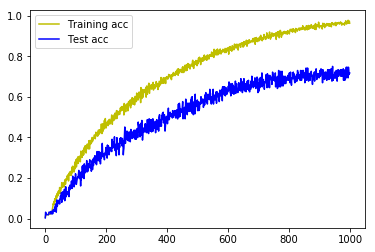

In [115]:
plt.plot(history.epoch, history.history.get('acc'), 'y', label='Training acc')
plt.plot(history.epoch, history.history.get('val_acc'), 'b', label='Test acc')
plt.legend()

# 模型优化1：

增大网络的容量提高模型的拟合精度：把层数增多

In [126]:
model = keras.Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', padding='same', input_shape=train_x_norm.shape[1:]))
model.add(layers.Conv1D(32, 7, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(32, 7, activation='relu', padding='same'))
model.add(layers.Conv1D(32, 7, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 7, activation='relu', padding='same'))
model.add(layers.Conv1D(64, 7, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 7, activation='relu', padding='same'))
model.add(layers.Conv1D(64, 7, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(99, activation='softmax'))

In [127]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 192, 32)           256       
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 192, 32)           7200      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 64, 32)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 32)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 64, 32)            7200      
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 64, 32)            7200      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 21, 32)            0         
__________

In [128]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [129]:
history = model.fit(train_x_norm, train_y, epochs=1000, batch_size=128, validation_data=(test_x_norm, test_y))

Train on 742 samples, validate on 248 samples
Epoch 1/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.6056 - acc: 0.0108 - val_loss: 4.5960 - val_acc: 0.0040
Epoch 2/1000
742/742 [==============================] - 0s 247us/step - loss: 4.5957 - acc: 0.0027 - val_loss: 4.5969 - val_acc: 0.0081
Epoch 3/1000
742/742 [==============================] - 0s 239us/step - loss: 4.5939 - acc: 0.0094 - val_loss: 4.5977 - val_acc: 0.0040
Epoch 4/1000
742/742 [==============================] - 0s 229us/step - loss: 4.5943 - acc: 0.0081 - val_loss: 4.5979 - val_acc: 0.0040
Epoch 5/1000
742/742 [==============================] - 0s 214us/step - loss: 4.5884 - acc: 0.0135 - val_loss: 4.5910 - val_acc: 0.0000e+00
Epoch 6/1000
742/742 [==============================] - 0s 208us/step - loss: 4.5827 - acc: 0.0135 - val_loss: 4.5841 - val_acc: 0.0081
Epoch 7/1000
742/742 [==============================] - 0s 205us/step - loss: 4.5580 - acc: 0.0135 - val_loss: 4.5814 - val_acc: 0.0081


Epoch 120/1000
742/742 [==============================] - 0s 199us/step - loss: 2.5453 - acc: 0.2695 - val_loss: 2.3786 - val_acc: 0.3871
Epoch 121/1000
742/742 [==============================] - 0s 200us/step - loss: 2.4238 - acc: 0.2884 - val_loss: 2.6137 - val_acc: 0.2661
Epoch 122/1000
742/742 [==============================] - 0s 194us/step - loss: 2.5402 - acc: 0.2642 - val_loss: 2.3194 - val_acc: 0.3548
Epoch 123/1000
742/742 [==============================] - 0s 201us/step - loss: 2.4630 - acc: 0.2749 - val_loss: 2.5061 - val_acc: 0.3347
Epoch 124/1000
742/742 [==============================] - 0s 192us/step - loss: 2.5079 - acc: 0.2722 - val_loss: 2.3377 - val_acc: 0.3911
Epoch 125/1000
742/742 [==============================] - 0s 197us/step - loss: 2.4772 - acc: 0.2951 - val_loss: 2.3060 - val_acc: 0.4032
Epoch 126/1000
742/742 [==============================] - 0s 198us/step - loss: 2.5144 - acc: 0.2601 - val_loss: 2.4137 - val_acc: 0.3911
Epoch 127/1000
742/742 [==========

742/742 [==============================] - 0s 194us/step - loss: 1.9138 - acc: 0.4340 - val_loss: 1.8866 - val_acc: 0.4758
Epoch 180/1000
742/742 [==============================] - 0s 197us/step - loss: 1.9476 - acc: 0.3908 - val_loss: 1.8600 - val_acc: 0.4718
Epoch 181/1000
742/742 [==============================] - 0s 194us/step - loss: 1.9025 - acc: 0.4030 - val_loss: 1.7997 - val_acc: 0.4960
Epoch 182/1000
742/742 [==============================] - 0s 198us/step - loss: 2.0157 - acc: 0.4137 - val_loss: 1.9195 - val_acc: 0.4516
Epoch 183/1000
742/742 [==============================] - 0s 195us/step - loss: 1.8535 - acc: 0.4111 - val_loss: 1.8484 - val_acc: 0.4476
Epoch 184/1000
742/742 [==============================] - 0s 195us/step - loss: 1.9020 - acc: 0.4259 - val_loss: 2.1661 - val_acc: 0.3145
Epoch 185/1000
742/742 [==============================] - 0s 199us/step - loss: 1.8486 - acc: 0.4097 - val_loss: 1.8139 - val_acc: 0.4718
Epoch 186/1000
742/742 [=========================

742/742 [==============================] - 0s 195us/step - loss: 1.3024 - acc: 0.5809 - val_loss: 1.3958 - val_acc: 0.5927
Epoch 298/1000
742/742 [==============================] - 0s 198us/step - loss: 1.3549 - acc: 0.5539 - val_loss: 1.7180 - val_acc: 0.4758
Epoch 299/1000
742/742 [==============================] - 0s 196us/step - loss: 1.4744 - acc: 0.5512 - val_loss: 1.5485 - val_acc: 0.5524
Epoch 300/1000
742/742 [==============================] - 0s 197us/step - loss: 1.3395 - acc: 0.5674 - val_loss: 1.3970 - val_acc: 0.6371
Epoch 301/1000
742/742 [==============================] - 0s 197us/step - loss: 1.3625 - acc: 0.5687 - val_loss: 1.3757 - val_acc: 0.6492
Epoch 302/1000
742/742 [==============================] - 0s 199us/step - loss: 1.5872 - acc: 0.5391 - val_loss: 1.4056 - val_acc: 0.5968
Epoch 303/1000
742/742 [==============================] - 0s 198us/step - loss: 1.2768 - acc: 0.5660 - val_loss: 1.4119 - val_acc: 0.6089
Epoch 304/1000
742/742 [=========================

742/742 [==============================] - 0s 193us/step - loss: 1.0859 - acc: 0.6415 - val_loss: 1.1455 - val_acc: 0.6935
Epoch 416/1000
742/742 [==============================] - 0s 201us/step - loss: 1.0239 - acc: 0.6442 - val_loss: 1.2082 - val_acc: 0.6371
Epoch 417/1000
742/742 [==============================] - 0s 196us/step - loss: 1.2121 - acc: 0.6253 - val_loss: 1.1415 - val_acc: 0.6774
Epoch 418/1000
742/742 [==============================] - 0s 197us/step - loss: 1.0061 - acc: 0.6685 - val_loss: 1.2002 - val_acc: 0.6734
Epoch 419/1000
742/742 [==============================] - 0s 204us/step - loss: 1.0451 - acc: 0.6482 - val_loss: 1.2332 - val_acc: 0.6573
Epoch 420/1000
742/742 [==============================] - 0s 196us/step - loss: 1.1153 - acc: 0.6334 - val_loss: 1.2931 - val_acc: 0.6331
Epoch 421/1000
742/742 [==============================] - 0s 198us/step - loss: 1.0271 - acc: 0.6442 - val_loss: 1.2041 - val_acc: 0.6734
Epoch 422/1000
742/742 [=========================

742/742 [==============================] - 0s 197us/step - loss: 0.7776 - acc: 0.7547 - val_loss: 1.0970 - val_acc: 0.7097
Epoch 534/1000
742/742 [==============================] - 0s 199us/step - loss: 0.8775 - acc: 0.6995 - val_loss: 1.0994 - val_acc: 0.6774
Epoch 535/1000
742/742 [==============================] - 0s 195us/step - loss: 0.8274 - acc: 0.7332 - val_loss: 1.0674 - val_acc: 0.7177
Epoch 536/1000
742/742 [==============================] - 0s 202us/step - loss: 1.0878 - acc: 0.6698 - val_loss: 1.0682 - val_acc: 0.6935
Epoch 537/1000
742/742 [==============================] - 0s 195us/step - loss: 0.8754 - acc: 0.7089 - val_loss: 1.0384 - val_acc: 0.7137
Epoch 538/1000
742/742 [==============================] - 0s 200us/step - loss: 0.7991 - acc: 0.7278 - val_loss: 1.0902 - val_acc: 0.7056
Epoch 539/1000
742/742 [==============================] - 0s 201us/step - loss: 0.8160 - acc: 0.7035 - val_loss: 1.0516 - val_acc: 0.7137
Epoch 540/1000
742/742 [=========================

742/742 [==============================] - 0s 211us/step - loss: 0.7631 - acc: 0.7561 - val_loss: 1.0941 - val_acc: 0.7137
Epoch 652/1000
742/742 [==============================] - 0s 207us/step - loss: 0.7630 - acc: 0.7278 - val_loss: 1.1158 - val_acc: 0.7177
Epoch 653/1000
742/742 [==============================] - 0s 207us/step - loss: 0.6801 - acc: 0.7925 - val_loss: 1.1510 - val_acc: 0.7218
Epoch 654/1000
742/742 [==============================] - 0s 207us/step - loss: 0.7062 - acc: 0.7655 - val_loss: 1.0631 - val_acc: 0.7258
Epoch 655/1000
742/742 [==============================] - 0s 205us/step - loss: 0.8700 - acc: 0.7264 - val_loss: 1.0047 - val_acc: 0.7500
Epoch 656/1000
742/742 [==============================] - 0s 206us/step - loss: 0.7204 - acc: 0.7453 - val_loss: 1.0789 - val_acc: 0.7056
Epoch 657/1000
742/742 [==============================] - 0s 200us/step - loss: 0.6642 - acc: 0.7682 - val_loss: 1.0621 - val_acc: 0.7258
Epoch 658/1000
742/742 [=========================

742/742 [==============================] - 0s 197us/step - loss: 0.7196 - acc: 0.7574 - val_loss: 0.9280 - val_acc: 0.7379
Epoch 770/1000
742/742 [==============================] - 0s 189us/step - loss: 0.7191 - acc: 0.7776 - val_loss: 0.9526 - val_acc: 0.7581
Epoch 771/1000
742/742 [==============================] - 0s 211us/step - loss: 0.6581 - acc: 0.7898 - val_loss: 1.1030 - val_acc: 0.7177
Epoch 772/1000
742/742 [==============================] - 0s 208us/step - loss: 0.5654 - acc: 0.8140 - val_loss: 1.0178 - val_acc: 0.7379
Epoch 773/1000
742/742 [==============================] - 0s 209us/step - loss: 0.6149 - acc: 0.8046 - val_loss: 0.9578 - val_acc: 0.7460
Epoch 774/1000
742/742 [==============================] - 0s 200us/step - loss: 0.6446 - acc: 0.7695 - val_loss: 0.9521 - val_acc: 0.7298
Epoch 775/1000
742/742 [==============================] - 0s 194us/step - loss: 0.7117 - acc: 0.7574 - val_loss: 1.0085 - val_acc: 0.7379
Epoch 776/1000
742/742 [=========================

742/742 [==============================] - 0s 198us/step - loss: 0.6351 - acc: 0.7965 - val_loss: 0.9892 - val_acc: 0.7419
Epoch 888/1000
742/742 [==============================] - 0s 205us/step - loss: 0.6363 - acc: 0.7925 - val_loss: 0.9426 - val_acc: 0.7500
Epoch 889/1000
742/742 [==============================] - 0s 205us/step - loss: 0.5924 - acc: 0.8167 - val_loss: 0.8997 - val_acc: 0.7661
Epoch 890/1000
742/742 [==============================] - 0s 207us/step - loss: 0.5641 - acc: 0.8046 - val_loss: 0.9175 - val_acc: 0.7621
Epoch 891/1000
742/742 [==============================] - 0s 207us/step - loss: 0.5144 - acc: 0.8288 - val_loss: 0.9050 - val_acc: 0.7540
Epoch 892/1000
742/742 [==============================] - 0s 203us/step - loss: 0.5863 - acc: 0.7938 - val_loss: 1.0070 - val_acc: 0.7379
Epoch 893/1000
742/742 [==============================] - 0s 208us/step - loss: 0.5184 - acc: 0.8261 - val_loss: 0.8648 - val_acc: 0.7863
Epoch 894/1000
742/742 [=========================

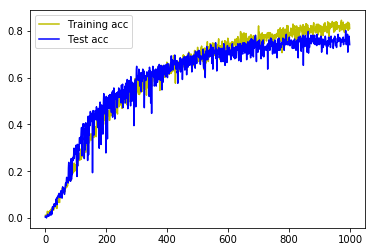

In [130]:
plt.plot(history.epoch, history.history.get('acc'), 'y', label='Training acc')
plt.plot(history.epoch, history.history.get('val_acc'), 'b', label='Test acc')
plt.legend()

效果：过拟合减弱了，但是模型的精度还是不够高！

提高模型精度主要行为就是“增大网络容量”：1. 把层增多；2. 每层的单元数增多

# 模型优化2：

优化策略：在上一种模型深度不变的条件下，增大每层的单元数。—— 提高网络容量，从而增加模型的精度上限。

In [116]:
model = keras.Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', padding='same', input_shape=train_x_norm.shape[1:]))
model.add(layers.Conv1D(32, 7, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 7, activation='relu', padding='same'))
model.add(layers.Conv1D(64, 7, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, 7, activation='relu', padding='same'))
model.add(layers.Conv1D(128, 7, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, 7, activation='relu', padding='same'))
model.add(layers.Conv1D(256, 7, activation='relu', padding='same'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(99, activation='softmax'))

In [117]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 192, 32)           256       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 192, 32)           7200      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 64, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 32)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 64, 64)            14400     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 64, 64)            28736     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 21, 64)            0         
__________

In [118]:
history = model.fit(train_x_norm, train_y, epochs=1000, batch_size=128, validation_data=(test_x_norm, test_y))

Train on 742 samples, validate on 248 samples
Epoch 1/1000
742/742 [==============================] - 4s 6ms/step - loss: 4.6237 - acc: 0.0081 - val_loss: 4.5973 - val_acc: 0.0000e+00
Epoch 2/1000
742/742 [==============================] - 0s 374us/step - loss: 4.5927 - acc: 0.0081 - val_loss: 4.5938 - val_acc: 0.0081
Epoch 3/1000
742/742 [==============================] - 0s 348us/step - loss: 4.5734 - acc: 0.0148 - val_loss: 4.5939 - val_acc: 0.0040
Epoch 4/1000
742/742 [==============================] - 0s 343us/step - loss: 4.5280 - acc: 0.0162 - val_loss: 4.5597 - val_acc: 0.0121
Epoch 5/1000
742/742 [==============================] - 0s 340us/step - loss: 4.5266 - acc: 0.0162 - val_loss: 4.5073 - val_acc: 0.0121
Epoch 6/1000
742/742 [==============================] - 0s 340us/step - loss: 4.4412 - acc: 0.0216 - val_loss: 4.3995 - val_acc: 0.0081
Epoch 7/1000
742/742 [==============================] - 0s 340us/step - loss: 4.4491 - acc: 0.0148 - val_loss: 4.4913 - val_acc: 0.0081


Epoch 120/1000
742/742 [==============================] - 0s 344us/step - loss: 0.6898 - acc: 0.7776 - val_loss: 1.0505 - val_acc: 0.6532
Epoch 121/1000
742/742 [==============================] - 0s 343us/step - loss: 0.4964 - acc: 0.8450 - val_loss: 1.1783 - val_acc: 0.6492
Epoch 122/1000
742/742 [==============================] - 0s 343us/step - loss: 0.4932 - acc: 0.8288 - val_loss: 1.5403 - val_acc: 0.5927
Epoch 123/1000
742/742 [==============================] - 0s 343us/step - loss: 0.7882 - acc: 0.7507 - val_loss: 1.1529 - val_acc: 0.6734
Epoch 124/1000
742/742 [==============================] - 0s 345us/step - loss: 0.4594 - acc: 0.8423 - val_loss: 1.0219 - val_acc: 0.6694
Epoch 125/1000
742/742 [==============================] - 0s 343us/step - loss: 0.5320 - acc: 0.8248 - val_loss: 1.9190 - val_acc: 0.5202
Epoch 126/1000
742/742 [==============================] - 0s 341us/step - loss: 0.6203 - acc: 0.7965 - val_loss: 1.0648 - val_acc: 0.6895
Epoch 127/1000
742/742 [==========

742/742 [==============================] - 0s 342us/step - loss: 0.0943 - acc: 0.9704 - val_loss: 1.1162 - val_acc: 0.7218
Epoch 239/1000
742/742 [==============================] - 0s 339us/step - loss: 0.1012 - acc: 0.9650 - val_loss: 0.9520 - val_acc: 0.7258
Epoch 240/1000
742/742 [==============================] - 0s 338us/step - loss: 0.0790 - acc: 0.9730 - val_loss: 0.9698 - val_acc: 0.7581
Epoch 241/1000
742/742 [==============================] - 0s 338us/step - loss: 0.1180 - acc: 0.9623 - val_loss: 1.1227 - val_acc: 0.7419
Epoch 242/1000
742/742 [==============================] - 0s 342us/step - loss: 0.0653 - acc: 0.9784 - val_loss: 0.9392 - val_acc: 0.7863
Epoch 243/1000
742/742 [==============================] - 0s 344us/step - loss: 0.0820 - acc: 0.9690 - val_loss: 1.0337 - val_acc: 0.7621
Epoch 244/1000
742/742 [==============================] - 0s 336us/step - loss: 0.3270 - acc: 0.9205 - val_loss: 0.9014 - val_acc: 0.7621
Epoch 245/1000
742/742 [=========================

742/742 [==============================] - 0s 343us/step - loss: 0.0499 - acc: 0.9771 - val_loss: 0.9011 - val_acc: 0.7903
Epoch 357/1000
742/742 [==============================] - 0s 341us/step - loss: 0.0831 - acc: 0.9838 - val_loss: 1.2187 - val_acc: 0.7218
Epoch 358/1000
742/742 [==============================] - 0s 344us/step - loss: 0.0406 - acc: 0.9838 - val_loss: 0.8033 - val_acc: 0.8185
Epoch 359/1000
742/742 [==============================] - 0s 339us/step - loss: 0.0533 - acc: 0.9838 - val_loss: 1.1287 - val_acc: 0.7621
Epoch 360/1000
742/742 [==============================] - 0s 338us/step - loss: 0.0527 - acc: 0.9838 - val_loss: 0.9908 - val_acc: 0.7661
Epoch 361/1000
742/742 [==============================] - 0s 335us/step - loss: 0.0381 - acc: 0.9879 - val_loss: 0.7788 - val_acc: 0.8024
Epoch 362/1000
742/742 [==============================] - 0s 342us/step - loss: 0.0370 - acc: 0.9906 - val_loss: 0.9980 - val_acc: 0.7823
Epoch 363/1000
742/742 [=========================

742/742 [==============================] - 0s 341us/step - loss: 0.0269 - acc: 0.9946 - val_loss: 1.1573 - val_acc: 0.7702
Epoch 475/1000
742/742 [==============================] - 0s 338us/step - loss: 0.0075 - acc: 0.9987 - val_loss: 1.2747 - val_acc: 0.7661
Epoch 476/1000
742/742 [==============================] - 0s 339us/step - loss: 0.0223 - acc: 0.9906 - val_loss: 1.1289 - val_acc: 0.7903
Epoch 477/1000
742/742 [==============================] - 0s 343us/step - loss: 0.0220 - acc: 0.9906 - val_loss: 1.3099 - val_acc: 0.7500
Epoch 478/1000
742/742 [==============================] - 0s 338us/step - loss: 0.0397 - acc: 0.9879 - val_loss: 1.0497 - val_acc: 0.7903
Epoch 479/1000
742/742 [==============================] - 0s 345us/step - loss: 0.0317 - acc: 0.9879 - val_loss: 1.2946 - val_acc: 0.7903
Epoch 480/1000
742/742 [==============================] - 0s 342us/step - loss: 0.0712 - acc: 0.9811 - val_loss: 1.0481 - val_acc: 0.7903
Epoch 481/1000
742/742 [=========================

742/742 [==============================] - 0s 343us/step - loss: 0.0299 - acc: 0.9919 - val_loss: 1.0974 - val_acc: 0.7782
Epoch 593/1000
742/742 [==============================] - 0s 342us/step - loss: 0.0177 - acc: 0.9933 - val_loss: 0.9966 - val_acc: 0.7944
Epoch 594/1000
742/742 [==============================] - 0s 341us/step - loss: 0.0080 - acc: 0.9973 - val_loss: 1.0836 - val_acc: 0.7984
Epoch 595/1000
742/742 [==============================] - 0s 340us/step - loss: 0.0221 - acc: 0.9960 - val_loss: 1.1888 - val_acc: 0.7984
Epoch 596/1000
742/742 [==============================] - 0s 343us/step - loss: 0.0623 - acc: 0.9838 - val_loss: 1.0101 - val_acc: 0.7782
Epoch 597/1000
742/742 [==============================] - 0s 343us/step - loss: 0.0217 - acc: 0.9906 - val_loss: 1.3040 - val_acc: 0.7782
Epoch 598/1000
742/742 [==============================] - 0s 344us/step - loss: 0.0399 - acc: 0.9865 - val_loss: 1.3011 - val_acc: 0.7702
Epoch 599/1000
742/742 [=========================

742/742 [==============================] - 0s 344us/step - loss: 0.0212 - acc: 0.9919 - val_loss: 1.0170 - val_acc: 0.8145
Epoch 711/1000
742/742 [==============================] - 0s 331us/step - loss: 0.0248 - acc: 0.9946 - val_loss: 0.9788 - val_acc: 0.8024
Epoch 712/1000
742/742 [==============================] - 0s 346us/step - loss: 0.0111 - acc: 0.9960 - val_loss: 0.9592 - val_acc: 0.8226
Epoch 713/1000
742/742 [==============================] - 0s 349us/step - loss: 0.0255 - acc: 0.9919 - val_loss: 1.1109 - val_acc: 0.7782
Epoch 714/1000
742/742 [==============================] - 0s 349us/step - loss: 0.0291 - acc: 0.9879 - val_loss: 1.0615 - val_acc: 0.7984
Epoch 715/1000
742/742 [==============================] - 0s 347us/step - loss: 0.0089 - acc: 0.9973 - val_loss: 0.9963 - val_acc: 0.8145
Epoch 716/1000
742/742 [==============================] - 0s 337us/step - loss: 0.0138 - acc: 0.9960 - val_loss: 0.8821 - val_acc: 0.8266
Epoch 717/1000
742/742 [=========================

742/742 [==============================] - 0s 344us/step - loss: 0.0155 - acc: 0.9946 - val_loss: 0.9773 - val_acc: 0.8226
Epoch 829/1000
742/742 [==============================] - 0s 339us/step - loss: 0.0164 - acc: 0.9919 - val_loss: 1.1971 - val_acc: 0.8145
Epoch 830/1000
742/742 [==============================] - 0s 341us/step - loss: 0.0432 - acc: 0.9933 - val_loss: 0.8414 - val_acc: 0.8387
Epoch 831/1000
742/742 [==============================] - 0s 345us/step - loss: 0.0274 - acc: 0.9933 - val_loss: 0.8963 - val_acc: 0.8427
Epoch 832/1000
742/742 [==============================] - 0s 337us/step - loss: 0.0078 - acc: 0.9973 - val_loss: 0.9717 - val_acc: 0.8427
Epoch 833/1000
742/742 [==============================] - 0s 338us/step - loss: 0.0316 - acc: 0.9906 - val_loss: 1.1701 - val_acc: 0.7984
Epoch 834/1000
742/742 [==============================] - 0s 341us/step - loss: 0.0094 - acc: 0.9973 - val_loss: 1.1306 - val_acc: 0.8145
Epoch 835/1000
742/742 [=========================

742/742 [==============================] - 0s 339us/step - loss: 0.0253 - acc: 0.9933 - val_loss: 0.8473 - val_acc: 0.8508
Epoch 947/1000
742/742 [==============================] - 0s 341us/step - loss: 0.0277 - acc: 0.9933 - val_loss: 0.7719 - val_acc: 0.8750
Epoch 948/1000
742/742 [==============================] - 0s 343us/step - loss: 0.0194 - acc: 0.9933 - val_loss: 0.8887 - val_acc: 0.8427
Epoch 949/1000
742/742 [==============================] - 0s 339us/step - loss: 0.0348 - acc: 0.9919 - val_loss: 0.9850 - val_acc: 0.8226
Epoch 950/1000
742/742 [==============================] - 0s 343us/step - loss: 0.0047 - acc: 0.9987 - val_loss: 0.9281 - val_acc: 0.8347
Epoch 951/1000
742/742 [==============================] - 0s 338us/step - loss: 0.0074 - acc: 0.9987 - val_loss: 0.9022 - val_acc: 0.8468
Epoch 952/1000
742/742 [==============================] - 0s 344us/step - loss: 0.0234 - acc: 0.9960 - val_loss: 1.1205 - val_acc: 0.8024
Epoch 953/1000
742/742 [=========================

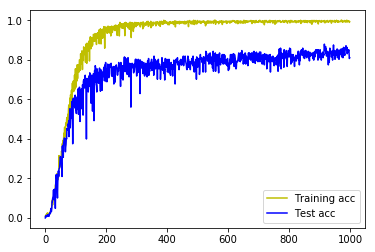

In [119]:
plt.plot(history.epoch, history.history.get('acc'), 'y', label='Training acc')
plt.plot(history.epoch, history.history.get('val_acc'), 'b', label='Test acc')
plt.legend()

效果：拟合训练集的精度已经很可以了，同时对测试数据的预测精度也有了提升；

但是：过拟合问题又出现了！—— 需要用dropout抑制一下。

# 模型优化3：

在上一种情况卷积池化后，再多加一个dropout层。

In [188]:
model = keras.Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', padding='same', input_shape=train_x_norm.shape[1:]))
model.add(layers.Conv1D(32, 7, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 7, activation='relu', padding='same'))
model.add(layers.Conv1D(64, 7, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, 7, activation='relu', padding='same'))
model.add(layers.Conv1D(128, 7, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, 7, activation='relu', padding='same'))
model.add(layers.Conv1D(256, 7, activation='relu', padding='same'))
model.add(layers.Dropout(0.5))  # 新加的！
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(99, activation='softmax'))

In [189]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [190]:
history = model.fit(train_x_norm, train_y, 
                    epochs=1000,  
                    validation_data=(test_x_norm, test_y))

Train on 742 samples, validate on 248 samples
Epoch 1/1000
742/742 [==============================] - 3s 4ms/step - loss: 4.6020 - acc: 0.0121 - val_loss: 4.5928 - val_acc: 0.0121
Epoch 2/1000
742/742 [==============================] - 0s 664us/step - loss: 4.5692 - acc: 0.0094 - val_loss: 4.4928 - val_acc: 0.0161
Epoch 3/1000
742/742 [==============================] - 1s 702us/step - loss: 4.5218 - acc: 0.0202 - val_loss: 4.5121 - val_acc: 0.0242
Epoch 4/1000
742/742 [==============================] - 1s 798us/step - loss: 4.4283 - acc: 0.0270 - val_loss: 4.3559 - val_acc: 0.0202
Epoch 5/1000
742/742 [==============================] - 1s 921us/step - loss: 4.3433 - acc: 0.0175 - val_loss: 4.2694 - val_acc: 0.0161
Epoch 6/1000
742/742 [==============================] - 1s 931us/step - loss: 4.2840 - acc: 0.0148 - val_loss: 4.2282 - val_acc: 0.0202
Epoch 7/1000
742/742 [==============================] - 1s 900us/step - loss: 4.2204 - acc: 0.0202 - val_loss: 4.1876 - val_acc: 0.0081
Epoc

Epoch 120/1000
742/742 [==============================] - 1s 703us/step - loss: 0.4584 - acc: 0.8450 - val_loss: 1.4030 - val_acc: 0.6452
Epoch 121/1000
742/742 [==============================] - 1s 716us/step - loss: 0.4393 - acc: 0.8531 - val_loss: 2.6163 - val_acc: 0.4153
Epoch 122/1000
742/742 [==============================] - 1s 708us/step - loss: 0.4463 - acc: 0.8693 - val_loss: 1.2851 - val_acc: 0.6532
Epoch 123/1000
742/742 [==============================] - 1s 697us/step - loss: 0.4352 - acc: 0.8598 - val_loss: 2.1825 - val_acc: 0.5403
Epoch 124/1000
742/742 [==============================] - 1s 719us/step - loss: 0.3967 - acc: 0.8639 - val_loss: 2.0706 - val_acc: 0.4960
Epoch 125/1000
742/742 [==============================] - 0s 672us/step - loss: 0.4147 - acc: 0.8612 - val_loss: 2.3156 - val_acc: 0.4798
Epoch 126/1000
742/742 [==============================] - 1s 710us/step - loss: 0.4231 - acc: 0.8679 - val_loss: 1.5909 - val_acc: 0.5605
Epoch 127/1000
742/742 [==========

742/742 [==============================] - 1s 738us/step - loss: 0.1338 - acc: 0.9596 - val_loss: 1.0892 - val_acc: 0.7500
Epoch 239/1000
742/742 [==============================] - 1s 688us/step - loss: 0.1279 - acc: 0.9582 - val_loss: 1.5667 - val_acc: 0.7056
Epoch 240/1000
742/742 [==============================] - 1s 714us/step - loss: 0.2181 - acc: 0.9299 - val_loss: 1.8664 - val_acc: 0.6210
Epoch 241/1000
742/742 [==============================] - 1s 708us/step - loss: 0.1792 - acc: 0.9461 - val_loss: 1.0810 - val_acc: 0.7298
Epoch 242/1000
742/742 [==============================] - 1s 687us/step - loss: 0.1166 - acc: 0.9650 - val_loss: 0.9015 - val_acc: 0.8065
Epoch 243/1000
742/742 [==============================] - 1s 740us/step - loss: 0.1386 - acc: 0.9609 - val_loss: 1.0283 - val_acc: 0.7500
Epoch 244/1000
742/742 [==============================] - 1s 693us/step - loss: 0.1509 - acc: 0.9609 - val_loss: 1.7953 - val_acc: 0.6573
Epoch 245/1000
742/742 [=========================

742/742 [==============================] - 1s 746us/step - loss: 0.1183 - acc: 0.9730 - val_loss: 1.1065 - val_acc: 0.7581
Epoch 357/1000
742/742 [==============================] - 1s 680us/step - loss: 0.1447 - acc: 0.9623 - val_loss: 0.8481 - val_acc: 0.8024
Epoch 358/1000
742/742 [==============================] - 0s 652us/step - loss: 0.1757 - acc: 0.9609 - val_loss: 1.3397 - val_acc: 0.7258
Epoch 359/1000
742/742 [==============================] - 1s 739us/step - loss: 0.0432 - acc: 0.9852 - val_loss: 0.6933 - val_acc: 0.8347
Epoch 360/1000
742/742 [==============================] - 1s 683us/step - loss: 0.0961 - acc: 0.9744 - val_loss: 1.1862 - val_acc: 0.7702
Epoch 361/1000
742/742 [==============================] - 1s 708us/step - loss: 0.1157 - acc: 0.9730 - val_loss: 0.8804 - val_acc: 0.8226
Epoch 362/1000
742/742 [==============================] - 1s 781us/step - loss: 0.1175 - acc: 0.9771 - val_loss: 0.8316 - val_acc: 0.8185
Epoch 363/1000
742/742 [=========================

742/742 [==============================] - 0s 664us/step - loss: 0.1244 - acc: 0.9730 - val_loss: 0.6668 - val_acc: 0.8710
Epoch 475/1000
742/742 [==============================] - 1s 700us/step - loss: 0.1144 - acc: 0.9717 - val_loss: 0.5744 - val_acc: 0.8669
Epoch 476/1000
742/742 [==============================] - 1s 737us/step - loss: 0.0536 - acc: 0.9865 - val_loss: 0.6453 - val_acc: 0.8387
Epoch 477/1000
742/742 [==============================] - 1s 714us/step - loss: 0.1474 - acc: 0.9677 - val_loss: 0.7177 - val_acc: 0.8387
Epoch 478/1000
742/742 [==============================] - 1s 725us/step - loss: 0.1278 - acc: 0.9690 - val_loss: 0.5244 - val_acc: 0.8831
Epoch 479/1000
742/742 [==============================] - 1s 724us/step - loss: 0.1142 - acc: 0.9730 - val_loss: 0.6962 - val_acc: 0.8589
Epoch 480/1000
742/742 [==============================] - 0s 674us/step - loss: 0.1413 - acc: 0.9663 - val_loss: 0.5906 - val_acc: 0.8750
Epoch 481/1000
742/742 [=========================

742/742 [==============================] - 1s 772us/step - loss: 0.0893 - acc: 0.9811 - val_loss: 0.6375 - val_acc: 0.8629
Epoch 593/1000
742/742 [==============================] - 1s 796us/step - loss: 0.0422 - acc: 0.9933 - val_loss: 0.7654 - val_acc: 0.8468
Epoch 594/1000
742/742 [==============================] - 1s 745us/step - loss: 0.2132 - acc: 0.9623 - val_loss: 0.6335 - val_acc: 0.8669
Epoch 595/1000
742/742 [==============================] - 1s 781us/step - loss: 0.1365 - acc: 0.9690 - val_loss: 0.8000 - val_acc: 0.8427
Epoch 596/1000
742/742 [==============================] - 1s 789us/step - loss: 0.1131 - acc: 0.9771 - val_loss: 0.6270 - val_acc: 0.8468
Epoch 597/1000
742/742 [==============================] - 1s 743us/step - loss: 0.1625 - acc: 0.9744 - val_loss: 0.7927 - val_acc: 0.8427
Epoch 598/1000
742/742 [==============================] - 1s 740us/step - loss: 0.2150 - acc: 0.9582 - val_loss: 0.6024 - val_acc: 0.8629
Epoch 599/1000
742/742 [=========================

742/742 [==============================] - 1s 719us/step - loss: 0.1472 - acc: 0.9771 - val_loss: 0.5582 - val_acc: 0.8589
Epoch 711/1000
742/742 [==============================] - 1s 735us/step - loss: 0.1277 - acc: 0.9717 - val_loss: 0.5872 - val_acc: 0.8589
Epoch 712/1000
742/742 [==============================] - 1s 724us/step - loss: 0.1114 - acc: 0.9784 - val_loss: 0.5112 - val_acc: 0.8710
Epoch 713/1000
742/742 [==============================] - 1s 696us/step - loss: 0.1665 - acc: 0.9717 - val_loss: 0.5217 - val_acc: 0.8629
Epoch 714/1000
742/742 [==============================] - 1s 776us/step - loss: 0.1660 - acc: 0.9717 - val_loss: 0.6678 - val_acc: 0.8427
Epoch 715/1000
742/742 [==============================] - 1s 708us/step - loss: 0.1596 - acc: 0.9717 - val_loss: 0.6171 - val_acc: 0.8306
Epoch 716/1000
742/742 [==============================] - 1s 693us/step - loss: 0.0950 - acc: 0.9744 - val_loss: 0.5532 - val_acc: 0.8548
Epoch 717/1000
742/742 [=========================

742/742 [==============================] - 1s 774us/step - loss: 0.1682 - acc: 0.9757 - val_loss: 0.6321 - val_acc: 0.8427
Epoch 829/1000
742/742 [==============================] - 1s 827us/step - loss: 0.1983 - acc: 0.9663 - val_loss: 0.5178 - val_acc: 0.8669
Epoch 830/1000
742/742 [==============================] - 1s 775us/step - loss: 0.2526 - acc: 0.9704 - val_loss: 0.6017 - val_acc: 0.8185
Epoch 831/1000
742/742 [==============================] - 1s 798us/step - loss: 0.2203 - acc: 0.9663 - val_loss: 0.5973 - val_acc: 0.8589
Epoch 832/1000
742/742 [==============================] - 1s 769us/step - loss: 0.2139 - acc: 0.9704 - val_loss: 0.5967 - val_acc: 0.8710
Epoch 833/1000
742/742 [==============================] - 1s 837us/step - loss: 0.1938 - acc: 0.9704 - val_loss: 0.4362 - val_acc: 0.8629
Epoch 834/1000
742/742 [==============================] - 1s 783us/step - loss: 0.1733 - acc: 0.9636 - val_loss: 0.6809 - val_acc: 0.8548
Epoch 835/1000
742/742 [=========================

742/742 [==============================] - 1s 755us/step - loss: 0.2281 - acc: 0.9677 - val_loss: 0.4872 - val_acc: 0.8831
Epoch 947/1000
742/742 [==============================] - 1s 751us/step - loss: 0.1592 - acc: 0.9798 - val_loss: 0.4821 - val_acc: 0.8911
Epoch 948/1000
742/742 [==============================] - 1s 744us/step - loss: 0.1710 - acc: 0.9744 - val_loss: 0.7832 - val_acc: 0.8750
Epoch 949/1000
742/742 [==============================] - 1s 764us/step - loss: 0.2013 - acc: 0.9744 - val_loss: 0.5655 - val_acc: 0.8831
Epoch 950/1000
742/742 [==============================] - 1s 734us/step - loss: 0.2112 - acc: 0.9636 - val_loss: 0.6840 - val_acc: 0.8548
Epoch 951/1000
742/742 [==============================] - 1s 748us/step - loss: 0.1803 - acc: 0.9757 - val_loss: 0.6701 - val_acc: 0.8750
Epoch 952/1000
742/742 [==============================] - 1s 743us/step - loss: 0.1133 - acc: 0.9865 - val_loss: 0.5428 - val_acc: 0.8548
Epoch 953/1000
742/742 [=========================

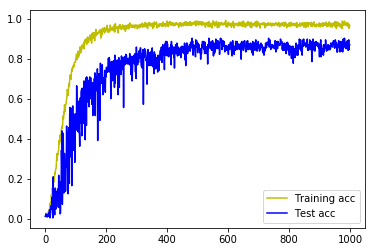

In [191]:
plt.plot(history.epoch, history.history.get('acc'), 'y', label='Training acc')
plt.plot(history.epoch, history.history.get('val_acc'), 'b', label='Test acc')
plt.legend()

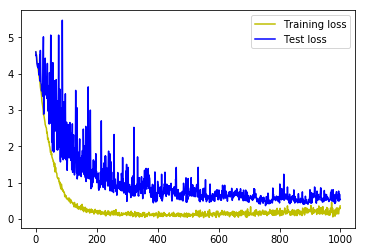

In [192]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

效果：对训练数据的拟合精度基本不受影响，但把过拟合问题给减弱了！对测试数据的预测精度又有了一点的提升。

问题：对测试数据的精度还是不够满意！能不能再提高对测试数据的预测精度？

# 模型优化4：

保持上一种的网络结构，此时把每个卷积层的“卷积核大小”增大（由原来的7变11）！即增大每个卷积的“感受野”

In [194]:
model = keras.Sequential()
model.add(layers.Conv1D(32, 11, activation='relu', padding='same', input_shape=train_x_norm.shape[1:]))
model.add(layers.Conv1D(32, 11, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 11, activation='relu', padding='same'))
model.add(layers.Conv1D(64, 11, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, 11, activation='relu', padding='same'))
model.add(layers.Conv1D(128, 11, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, 11, activation='relu', padding='same'))
model.add(layers.Conv1D(256, 11, activation='relu', padding='same'))
model.add(layers.Dropout(0.5))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(99, activation='softmax'))

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [195]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_146 (Conv1D)          (None, 192, 32)           384       
_________________________________________________________________
conv1d_147 (Conv1D)          (None, 192, 32)           11296     
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 64, 32)            0         
_________________________________________________________________
dropout_84 (Dropout)         (None, 64, 32)            0         
_________________________________________________________________
conv1d_148 (Conv1D)          (None, 64, 64)            22592     
_________________________________________________________________
conv1d_149 (Conv1D)          (None, 64, 64)            45120     
_________________________________________________________________
max_pooling1d_58 (MaxPooling (None, 21, 64)            0         
__________

In [196]:
history = model.fit(train_x_norm, train_y, 
                    epochs=1000,  
                    validation_data=(test_x_norm, test_y))

Train on 742 samples, validate on 248 samples
Epoch 1/1000
742/742 [==============================] - 6s 8ms/step - loss: 4.6058 - acc: 0.0081 - val_loss: 4.5978 - val_acc: 0.0000e+00
Epoch 2/1000
742/742 [==============================] - 1s 866us/step - loss: 4.6004 - acc: 0.0081 - val_loss: 4.5920 - val_acc: 0.0081
Epoch 3/1000
742/742 [==============================] - 1s 815us/step - loss: 4.5570 - acc: 0.0175 - val_loss: 4.5718 - val_acc: 0.0081
Epoch 4/1000
742/742 [==============================] - 1s 808us/step - loss: 4.4646 - acc: 0.0148 - val_loss: 4.3999 - val_acc: 0.0081
Epoch 5/1000
742/742 [==============================] - 1s 805us/step - loss: 4.4445 - acc: 0.0216 - val_loss: 4.5878 - val_acc: 0.0161
Epoch 6/1000
742/742 [==============================] - 1s 822us/step - loss: 4.3410 - acc: 0.0175 - val_loss: 4.2914 - val_acc: 0.0161
Epoch 7/1000
742/742 [==============================] - 1s 812us/step - loss: 4.2709 - acc: 0.0148 - val_loss: 4.2811 - val_acc: 0.0202


Epoch 120/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.4458 - acc: 0.8544 - val_loss: 2.9548 - val_acc: 0.4677
Epoch 121/1000
742/742 [==============================] - 1s 991us/step - loss: 0.4173 - acc: 0.8544 - val_loss: 3.1684 - val_acc: 0.4677
Epoch 122/1000
742/742 [==============================] - 1s 996us/step - loss: 0.4702 - acc: 0.8504 - val_loss: 2.2898 - val_acc: 0.5161
Epoch 123/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.5016 - acc: 0.8315 - val_loss: 2.2048 - val_acc: 0.5403
Epoch 124/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.4388 - acc: 0.8558 - val_loss: 2.3782 - val_acc: 0.5323
Epoch 125/1000
742/742 [==============================] - 1s 976us/step - loss: 0.4297 - acc: 0.8652 - val_loss: 1.9080 - val_acc: 0.6250
Epoch 126/1000
742/742 [==============================] - 1s 936us/step - loss: 0.3669 - acc: 0.8760 - val_loss: 2.0821 - val_acc: 0.5565
Epoch 127/1000
742/742 [================

742/742 [==============================] - 1s 924us/step - loss: 0.2108 - acc: 0.9555 - val_loss: 1.4560 - val_acc: 0.7258
Epoch 239/1000
742/742 [==============================] - 1s 932us/step - loss: 0.2136 - acc: 0.9582 - val_loss: 0.9552 - val_acc: 0.7702
Epoch 240/1000
742/742 [==============================] - 1s 912us/step - loss: 0.2079 - acc: 0.9447 - val_loss: 0.9516 - val_acc: 0.8024
Epoch 241/1000
742/742 [==============================] - 1s 891us/step - loss: 0.2354 - acc: 0.9420 - val_loss: 1.8070 - val_acc: 0.6855
Epoch 242/1000
742/742 [==============================] - 1s 900us/step - loss: 0.1921 - acc: 0.9474 - val_loss: 1.5499 - val_acc: 0.7218
Epoch 243/1000
742/742 [==============================] - 1s 874us/step - loss: 0.2541 - acc: 0.9340 - val_loss: 1.3214 - val_acc: 0.7258
Epoch 244/1000
742/742 [==============================] - 1s 902us/step - loss: 0.2269 - acc: 0.9447 - val_loss: 2.5815 - val_acc: 0.5645
Epoch 245/1000
742/742 [=========================

Epoch 298/1000
742/742 [==============================] - 1s 977us/step - loss: 0.1934 - acc: 0.9569 - val_loss: 0.9903 - val_acc: 0.8024
Epoch 299/1000
742/742 [==============================] - 1s 942us/step - loss: 0.2285 - acc: 0.9407 - val_loss: 1.4918 - val_acc: 0.7621
Epoch 300/1000
742/742 [==============================] - 1s 915us/step - loss: 0.2439 - acc: 0.9515 - val_loss: 0.6993 - val_acc: 0.8347
Epoch 301/1000
742/742 [==============================] - 1s 902us/step - loss: 0.1390 - acc: 0.9623 - val_loss: 0.8275 - val_acc: 0.8347
Epoch 302/1000
742/742 [==============================] - 1s 916us/step - loss: 0.2268 - acc: 0.9488 - val_loss: 1.2828 - val_acc: 0.7702
Epoch 303/1000
742/742 [==============================] - 1s 927us/step - loss: 0.1718 - acc: 0.9677 - val_loss: 1.2446 - val_acc: 0.7661
Epoch 304/1000
742/742 [==============================] - 1s 914us/step - loss: 0.1681 - acc: 0.9663 - val_loss: 0.9148 - val_acc: 0.7984
Epoch 305/1000
742/742 [==========

742/742 [==============================] - 1s 920us/step - loss: 0.1132 - acc: 0.9784 - val_loss: 0.8658 - val_acc: 0.8347
Epoch 358/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.0754 - acc: 0.9811 - val_loss: 1.5937 - val_acc: 0.7782
Epoch 359/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.2836 - acc: 0.9555 - val_loss: 0.7999 - val_acc: 0.8589
Epoch 360/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.1862 - acc: 0.9623 - val_loss: 0.9107 - val_acc: 0.8105
Epoch 361/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.2292 - acc: 0.9569 - val_loss: 0.8793 - val_acc: 0.8185
Epoch 362/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.1882 - acc: 0.9677 - val_loss: 1.2353 - val_acc: 0.7863
Epoch 363/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.1820 - acc: 0.9650 - val_loss: 1.0955 - val_acc: 0.7823
Epoch 364/1000
742/742 [==============================] - 1s 

Epoch 417/1000
742/742 [==============================] - 1s 971us/step - loss: 0.1906 - acc: 0.9569 - val_loss: 0.9191 - val_acc: 0.8387
Epoch 418/1000
742/742 [==============================] - 1s 970us/step - loss: 0.2412 - acc: 0.9596 - val_loss: 0.8795 - val_acc: 0.8105
Epoch 419/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.1736 - acc: 0.9730 - val_loss: 0.9830 - val_acc: 0.8306
Epoch 420/1000
742/742 [==============================] - 1s 981us/step - loss: 0.1739 - acc: 0.9704 - val_loss: 1.6603 - val_acc: 0.7863
Epoch 421/1000
742/742 [==============================] - 1s 994us/step - loss: 0.2348 - acc: 0.9569 - val_loss: 1.0235 - val_acc: 0.8145
Epoch 422/1000
742/742 [==============================] - 1s 983us/step - loss: 0.2544 - acc: 0.9582 - val_loss: 1.0905 - val_acc: 0.7863
Epoch 423/1000
742/742 [==============================] - 1s 1ms/step - loss: 0.1277 - acc: 0.9757 - val_loss: 0.7429 - val_acc: 0.8387
Epoch 424/1000
742/742 [==============

742/742 [==============================] - 1s 877us/step - loss: 0.1517 - acc: 0.9717 - val_loss: 0.8276 - val_acc: 0.8911
Epoch 536/1000
742/742 [==============================] - 1s 853us/step - loss: 0.3596 - acc: 0.9447 - val_loss: 0.7216 - val_acc: 0.8790
Epoch 537/1000
742/742 [==============================] - 1s 884us/step - loss: 0.2611 - acc: 0.9650 - val_loss: 0.8046 - val_acc: 0.8508
Epoch 538/1000
742/742 [==============================] - 1s 868us/step - loss: 0.2407 - acc: 0.9555 - val_loss: 0.9102 - val_acc: 0.8548
Epoch 539/1000
742/742 [==============================] - 1s 891us/step - loss: 0.3777 - acc: 0.9582 - val_loss: 1.6590 - val_acc: 0.7742
Epoch 540/1000
742/742 [==============================] - 1s 884us/step - loss: 0.2893 - acc: 0.9528 - val_loss: 0.8162 - val_acc: 0.8427
Epoch 541/1000
742/742 [==============================] - 1s 892us/step - loss: 0.2535 - acc: 0.9609 - val_loss: 0.6061 - val_acc: 0.8710
Epoch 542/1000
742/742 [=========================

742/742 [==============================] - 1s 847us/step - loss: 0.3373 - acc: 0.9596 - val_loss: 1.0222 - val_acc: 0.7903
Epoch 654/1000
742/742 [==============================] - 1s 926us/step - loss: 0.3495 - acc: 0.9596 - val_loss: 1.1795 - val_acc: 0.7984
Epoch 655/1000
742/742 [==============================] - 1s 874us/step - loss: 0.5315 - acc: 0.9394 - val_loss: 0.8958 - val_acc: 0.8185
Epoch 656/1000
742/742 [==============================] - 1s 900us/step - loss: 0.2896 - acc: 0.9582 - val_loss: 0.8381 - val_acc: 0.8629
Epoch 657/1000
742/742 [==============================] - 1s 863us/step - loss: 0.1950 - acc: 0.9744 - val_loss: 0.9577 - val_acc: 0.8145
Epoch 658/1000
742/742 [==============================] - 1s 881us/step - loss: 0.3655 - acc: 0.9501 - val_loss: 0.8240 - val_acc: 0.8347
Epoch 659/1000
742/742 [==============================] - 1s 890us/step - loss: 0.2869 - acc: 0.9704 - val_loss: 0.9086 - val_acc: 0.8629
Epoch 660/1000
742/742 [=========================

742/742 [==============================] - 1s 896us/step - loss: 0.2660 - acc: 0.9677 - val_loss: 1.2089 - val_acc: 0.8266
Epoch 772/1000
742/742 [==============================] - 1s 863us/step - loss: 0.3085 - acc: 0.9636 - val_loss: 1.0602 - val_acc: 0.8548
Epoch 773/1000
742/742 [==============================] - 1s 873us/step - loss: 0.3705 - acc: 0.9596 - val_loss: 1.4556 - val_acc: 0.8226
Epoch 774/1000
742/742 [==============================] - 1s 882us/step - loss: 0.3756 - acc: 0.9596 - val_loss: 0.7729 - val_acc: 0.8589
Epoch 775/1000
742/742 [==============================] - 1s 884us/step - loss: 0.4421 - acc: 0.9528 - val_loss: 1.0358 - val_acc: 0.8427
Epoch 776/1000
742/742 [==============================] - 1s 854us/step - loss: 0.4242 - acc: 0.9596 - val_loss: 0.8419 - val_acc: 0.8468
Epoch 777/1000
742/742 [==============================] - 1s 840us/step - loss: 0.4116 - acc: 0.9623 - val_loss: 0.8631 - val_acc: 0.8790
Epoch 778/1000
742/742 [=========================

742/742 [==============================] - 1s 881us/step - loss: 0.4508 - acc: 0.9623 - val_loss: 1.6721 - val_acc: 0.8669
Epoch 890/1000
742/742 [==============================] - 1s 905us/step - loss: 0.6535 - acc: 0.9461 - val_loss: 1.3675 - val_acc: 0.8750
Epoch 891/1000
742/742 [==============================] - 1s 870us/step - loss: 0.4066 - acc: 0.9650 - val_loss: 1.2536 - val_acc: 0.8871
Epoch 892/1000
742/742 [==============================] - 1s 890us/step - loss: 0.4678 - acc: 0.9582 - val_loss: 1.3952 - val_acc: 0.8710
Epoch 893/1000
742/742 [==============================] - 1s 884us/step - loss: 0.3446 - acc: 0.9717 - val_loss: 1.2336 - val_acc: 0.8669
Epoch 894/1000
742/742 [==============================] - 1s 875us/step - loss: 0.2603 - acc: 0.9744 - val_loss: 1.1388 - val_acc: 0.8831
Epoch 895/1000
742/742 [==============================] - 1s 873us/step - loss: 0.3828 - acc: 0.9677 - val_loss: 1.9407 - val_acc: 0.8347
Epoch 896/1000
742/742 [=========================

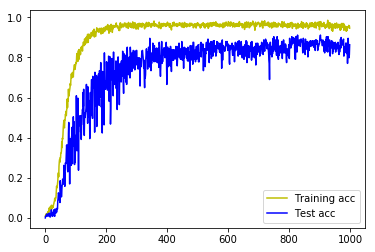

In [197]:
plt.plot(history.epoch, history.history.get('acc'), 'y', label='Training acc')
plt.plot(history.epoch, history.history.get('val_acc'), 'b', label='Test acc')
plt.legend()

效果：精度确实又高了！过拟合问题也不明显。

问题：既然增大每个卷积核的“感受野”有效，那是不是再多增加一些这样的卷积核能看到更多的特征呢？

# 模型优化5：

保存上一种模型结构不变，进一步加大每层的卷积核数(还是用大感受野的卷积核)：

In [198]:
model = keras.Sequential()
model.add(layers.Conv1D(64, 11, activation='relu', padding='same', input_shape=train_x_norm.shape[1:]))
model.add(layers.Conv1D(64, 11, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, 11, activation='relu', padding='same'))
model.add(layers.Conv1D(128, 11, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, 11, activation='relu', padding='same'))
model.add(layers.Conv1D(256, 11, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(512, 11, activation='relu', padding='same'))
model.add(layers.Conv1D(512, 11, activation='relu', padding='same'))  # 卷积核数进一步加大！
model.add(layers.Dropout(0.5))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(99, activation='softmax'))

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [199]:
history = model.fit(train_x_norm, train_y, 
                    epochs=1000,  
                    validation_data=(test_x_norm, test_y))

Train on 742 samples, validate on 248 samples
Epoch 1/1000
742/742 [==============================] - 7s 9ms/step - loss: 4.7777 - acc: 0.0135 - val_loss: 4.5977 - val_acc: 0.0081
Epoch 2/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5955 - acc: 0.0081 - val_loss: 4.5997 - val_acc: 0.0081
Epoch 3/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5957 - acc: 0.0067 - val_loss: 4.6018 - val_acc: 0.0081
Epoch 4/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5949 - acc: 0.0094 - val_loss: 4.6036 - val_acc: 0.0040
Epoch 5/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5934 - acc: 0.0081 - val_loss: 5.0594 - val_acc: 0.0040
Epoch 6/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.6026 - acc: 0.0148 - val_loss: 4.5616 - val_acc: 0.0121
Epoch 7/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5343 - acc: 0.0121 - val_loss: 4.5163 - val_acc: 0.0121
Epoch 8/1000
742

742/742 [==============================] - 2s 3ms/step - loss: 0.1464 - acc: 0.9704 - val_loss: 0.9100 - val_acc: 0.8427
Epoch 122/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.1252 - acc: 0.9663 - val_loss: 1.3231 - val_acc: 0.7540
Epoch 123/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.1303 - acc: 0.9663 - val_loss: 0.8901 - val_acc: 0.8387
Epoch 124/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.1128 - acc: 0.9730 - val_loss: 0.6754 - val_acc: 0.8387
Epoch 125/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.1435 - acc: 0.9704 - val_loss: 0.8714 - val_acc: 0.8427
Epoch 126/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.1241 - acc: 0.9717 - val_loss: 1.0712 - val_acc: 0.8145
Epoch 127/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.2076 - acc: 0.9609 - val_loss: 0.7443 - val_acc: 0.8427
Epoch 128/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 0.2171 - acc: 0.9704 - val_loss: 0.9823 - val_acc: 0.8750
Epoch 242/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.1884 - acc: 0.9757 - val_loss: 0.8796 - val_acc: 0.8871
Epoch 243/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.1973 - acc: 0.9730 - val_loss: 1.0676 - val_acc: 0.8669
Epoch 244/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.1589 - acc: 0.9744 - val_loss: 0.8986 - val_acc: 0.8790
Epoch 245/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.0789 - acc: 0.9852 - val_loss: 1.1140 - val_acc: 0.8831
Epoch 246/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3191 - acc: 0.9582 - val_loss: 0.8235 - val_acc: 0.8669
Epoch 247/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.2938 - acc: 0.9677 - val_loss: 0.6063 - val_acc: 0.8992
Epoch 248/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 0.4517 - acc: 0.9623 - val_loss: 1.4859 - val_acc: 0.8952
Epoch 362/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.2623 - acc: 0.9784 - val_loss: 1.9000 - val_acc: 0.8629
Epoch 363/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.4907 - acc: 0.9636 - val_loss: 1.6235 - val_acc: 0.8710
Epoch 364/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.4513 - acc: 0.9650 - val_loss: 1.6743 - val_acc: 0.8790
Epoch 365/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3919 - acc: 0.9730 - val_loss: 2.1117 - val_acc: 0.8548
Epoch 366/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3541 - acc: 0.9730 - val_loss: 1.4154 - val_acc: 0.8992
Epoch 367/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.4277 - acc: 0.9717 - val_loss: 1.6035 - val_acc: 0.8831
Epoch 368/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 1.1143 - acc: 0.9299 - val_loss: 2.5955 - val_acc: 0.8387
Epoch 482/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.6746 - acc: 0.9569 - val_loss: 3.1593 - val_acc: 0.8024
Epoch 483/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.2546 - acc: 0.9191 - val_loss: 3.4227 - val_acc: 0.7863
Epoch 484/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.6101 - acc: 0.8989 - val_loss: 3.2021 - val_acc: 0.7944
Epoch 485/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.0861 - acc: 0.9326 - val_loss: 3.1210 - val_acc: 0.8065
Epoch 486/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.0140 - acc: 0.9367 - val_loss: 2.4063 - val_acc: 0.8468
Epoch 487/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.1639 - acc: 0.9272 - val_loss: 2.2100 - val_acc: 0.8629
Epoch 488/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 3.1582 - acc: 0.8019 - val_loss: 3.5746 - val_acc: 0.7782
Epoch 602/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.1661 - acc: 0.8612 - val_loss: 3.4609 - val_acc: 0.7823
Epoch 603/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.3500 - acc: 0.8531 - val_loss: 3.7696 - val_acc: 0.7661
Epoch 604/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.0718 - acc: 0.7453 - val_loss: 5.1994 - val_acc: 0.6774
Epoch 605/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.1064 - acc: 0.8073 - val_loss: 4.4195 - val_acc: 0.7258
Epoch 606/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.8022 - acc: 0.8261 - val_loss: 4.4195 - val_acc: 0.7258
Epoch 607/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.4134 - acc: 0.8491 - val_loss: 3.4446 - val_acc: 0.7863
Epoch 608/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 1.8464 - acc: 0.8854 - val_loss: 3.5572 - val_acc: 0.7782
Epoch 722/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.3569 - acc: 0.8531 - val_loss: 3.5096 - val_acc: 0.7823
Epoch 723/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.9556 - acc: 0.8787 - val_loss: 3.2600 - val_acc: 0.7944
Epoch 724/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.3184 - acc: 0.8558 - val_loss: 3.8346 - val_acc: 0.7621
Epoch 725/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.2810 - acc: 0.8585 - val_loss: 3.8346 - val_acc: 0.7621
Epoch 726/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.6001 - acc: 0.8383 - val_loss: 3.8346 - val_acc: 0.7621
Epoch 727/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.6066 - acc: 0.8383 - val_loss: 4.2895 - val_acc: 0.7339
Epoch 728/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 3.4104 - acc: 0.7884 - val_loss: 4.6145 - val_acc: 0.7137
Epoch 842/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.3453 - acc: 0.7925 - val_loss: 4.6145 - val_acc: 0.7137
Epoch 843/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.3887 - acc: 0.7898 - val_loss: 4.6145 - val_acc: 0.7137
Epoch 844/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.4756 - acc: 0.7844 - val_loss: 4.6145 - val_acc: 0.7137
Epoch 845/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.4322 - acc: 0.7871 - val_loss: 4.4274 - val_acc: 0.7218
Epoch 846/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.4322 - acc: 0.7871 - val_loss: 4.5495 - val_acc: 0.7177
Epoch 847/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.0848 - acc: 0.8086 - val_loss: 4.2917 - val_acc: 0.7339
Epoch 848/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 3.0774 - acc: 0.8086 - val_loss: 5.3294 - val_acc: 0.6694
Epoch 962/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.8496 - acc: 0.7601 - val_loss: 4.4845 - val_acc: 0.7218
Epoch 963/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.3887 - acc: 0.7898 - val_loss: 4.5495 - val_acc: 0.7177
Epoch 964/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.0121 - acc: 0.7507 - val_loss: 5.1344 - val_acc: 0.6815
Epoch 965/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.4966 - acc: 0.7210 - val_loss: 4.6145 - val_acc: 0.7137
Epoch 966/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.8053 - acc: 0.7628 - val_loss: 4.0945 - val_acc: 0.7460
Epoch 967/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.4744 - acc: 0.7844 - val_loss: 4.1595 - val_acc: 0.7419
Epoch 968/1000
742/742 [==============================] - 2s 3m

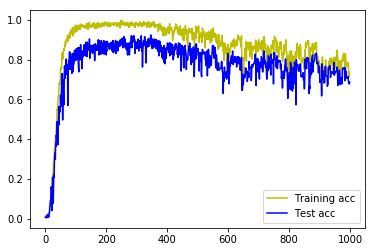

In [200]:
plt.plot(history.epoch, history.history.get('acc'), 'y', label='Training acc')
plt.plot(history.epoch, history.history.get('val_acc'), 'b', label='Test acc')
plt.legend()

只看前面的结果：效果略有提升，但已经不明显了。到后面的epoch已经开始“梯度消失”了。

# 模型优化6：

最后的尝试：多加一个全连接Dense层看看效果。

但理论上Dense的作用只起“特征汇聚”，它不负责提取更多的特征！因此预计效果的提升很有限。

In [202]:
model = keras.Sequential()
model.add(layers.Conv1D(64, 11, activation='relu', padding='same', input_shape=train_x_norm.shape[1:]))
model.add(layers.Conv1D(64, 11, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, 11, activation='relu', padding='same'))
model.add(layers.Conv1D(128, 11, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, 11, activation='relu', padding='same'))
model.add(layers.Conv1D(256, 11, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(512, 11, activation='relu', padding='same'))
model.add(layers.Conv1D(512, 11, activation='relu', padding='same'))
model.add(layers.Dropout(0.5))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))   # 多加一个全连接层
model.add(layers.Dropout(0.5))
model.add(layers.Dense(99, activation='softmax'))

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [203]:
history = model.fit(train_x_norm, train_y, 
                    epochs=1000,  
                    validation_data=(test_x_norm, test_y))

Train on 742 samples, validate on 248 samples
Epoch 1/1000
742/742 [==============================] - 6s 8ms/step - loss: 4.7511 - acc: 0.0067 - val_loss: 4.5987 - val_acc: 0.0040
Epoch 2/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5954 - acc: 0.0135 - val_loss: 4.6020 - val_acc: 0.0040
Epoch 3/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5963 - acc: 0.0067 - val_loss: 4.6039 - val_acc: 0.0040
Epoch 4/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5945 - acc: 0.0121 - val_loss: 4.6087 - val_acc: 0.0040
Epoch 5/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5963 - acc: 0.0094 - val_loss: 4.6122 - val_acc: 0.0040
Epoch 6/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5936 - acc: 0.0135 - val_loss: 4.6158 - val_acc: 0.0040
Epoch 7/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.5991 - acc: 0.0135 - val_loss: 4.6200 - val_acc: 0.0000e+00
Epoch 8/1000

742/742 [==============================] - 2s 3ms/step - loss: 0.4786 - acc: 0.8544 - val_loss: 0.9325 - val_acc: 0.7702
Epoch 122/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.4813 - acc: 0.8639 - val_loss: 1.0239 - val_acc: 0.7500
Epoch 123/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.4599 - acc: 0.8693 - val_loss: 0.9969 - val_acc: 0.7702
Epoch 124/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3733 - acc: 0.8787 - val_loss: 0.8049 - val_acc: 0.8145
Epoch 125/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.4441 - acc: 0.8760 - val_loss: 0.6931 - val_acc: 0.8185
Epoch 126/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.4571 - acc: 0.8693 - val_loss: 0.6719 - val_acc: 0.8145
Epoch 127/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3360 - acc: 0.9057 - val_loss: 0.5870 - val_acc: 0.8266
Epoch 128/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 0.2554 - acc: 0.9420 - val_loss: 0.8293 - val_acc: 0.8266
Epoch 182/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.2511 - acc: 0.9394 - val_loss: 0.5418 - val_acc: 0.8508
Epoch 183/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.2948 - acc: 0.9474 - val_loss: 1.9344 - val_acc: 0.7218
Epoch 184/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3072 - acc: 0.9380 - val_loss: 0.5495 - val_acc: 0.8790
Epoch 185/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.2691 - acc: 0.9488 - val_loss: 0.7347 - val_acc: 0.8508
Epoch 186/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.2122 - acc: 0.9528 - val_loss: 0.5877 - val_acc: 0.8790
Epoch 187/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.2890 - acc: 0.9447 - val_loss: 0.5279 - val_acc: 0.8790
Epoch 188/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 0.4155 - acc: 0.9555 - val_loss: 0.7385 - val_acc: 0.8911
Epoch 302/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.4163 - acc: 0.9461 - val_loss: 0.7909 - val_acc: 0.8589
Epoch 303/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3072 - acc: 0.9555 - val_loss: 0.6908 - val_acc: 0.8790
Epoch 304/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.2514 - acc: 0.9636 - val_loss: 0.4887 - val_acc: 0.9113
Epoch 305/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3866 - acc: 0.9569 - val_loss: 0.4317 - val_acc: 0.9113
Epoch 306/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3339 - acc: 0.9582 - val_loss: 0.4411 - val_acc: 0.9032
Epoch 307/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.2340 - acc: 0.9677 - val_loss: 0.4737 - val_acc: 0.8992
Epoch 308/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 0.4218 - acc: 0.9623 - val_loss: 0.8415 - val_acc: 0.8831
Epoch 422/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.4540 - acc: 0.9569 - val_loss: 1.0049 - val_acc: 0.9032
Epoch 423/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3331 - acc: 0.9757 - val_loss: 1.0174 - val_acc: 0.9194
Epoch 424/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.3104 - acc: 0.9730 - val_loss: 0.9223 - val_acc: 0.9234
Epoch 425/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.6303 - acc: 0.9515 - val_loss: 1.2629 - val_acc: 0.8992
Epoch 426/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.5044 - acc: 0.9515 - val_loss: 0.8866 - val_acc: 0.9073
Epoch 427/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.4260 - acc: 0.9623 - val_loss: 1.4383 - val_acc: 0.8145
Epoch 428/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 1.1631 - acc: 0.9218 - val_loss: 2.0497 - val_acc: 0.8589
Epoch 482/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.9298 - acc: 0.9380 - val_loss: 1.8221 - val_acc: 0.8790
Epoch 483/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.9969 - acc: 0.9313 - val_loss: 1.8168 - val_acc: 0.8790
Epoch 484/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.4324 - acc: 0.9084 - val_loss: 2.0814 - val_acc: 0.8629
Epoch 485/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.1006 - acc: 0.9272 - val_loss: 2.0817 - val_acc: 0.8548
Epoch 486/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.4521 - acc: 0.9043 - val_loss: 1.5497 - val_acc: 0.8911
Epoch 487/1000
742/742 [==============================] - 2s 3ms/step - loss: 0.9226 - acc: 0.9353 - val_loss: 1.7194 - val_acc: 0.8790
Epoch 488/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 1.4500 - acc: 0.9057 - val_loss: 1.7829 - val_acc: 0.8790
Epoch 602/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.6623 - acc: 0.8949 - val_loss: 1.5132 - val_acc: 0.9032
Epoch 603/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.4208 - acc: 0.9097 - val_loss: 1.9073 - val_acc: 0.8790
Epoch 604/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.7528 - acc: 0.8854 - val_loss: 2.2469 - val_acc: 0.8589
Epoch 605/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.0896 - acc: 0.8679 - val_loss: 2.5195 - val_acc: 0.8387
Epoch 606/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.0632 - acc: 0.9313 - val_loss: 2.5114 - val_acc: 0.8306
Epoch 607/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.7336 - acc: 0.8908 - val_loss: 2.3548 - val_acc: 0.8508
Epoch 608/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 3.5472 - acc: 0.7776 - val_loss: 3.8996 - val_acc: 0.7581
Epoch 662/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.0023 - acc: 0.8747 - val_loss: 2.3461 - val_acc: 0.8508
Epoch 663/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.6292 - acc: 0.8989 - val_loss: 2.3389 - val_acc: 0.8508
Epoch 664/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.0446 - acc: 0.8679 - val_loss: 2.8034 - val_acc: 0.8226
Epoch 665/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.3803 - acc: 0.8518 - val_loss: 3.0332 - val_acc: 0.8105
Epoch 666/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.1274 - acc: 0.8666 - val_loss: 2.7947 - val_acc: 0.8266
Epoch 667/1000
742/742 [==============================] - 2s 3ms/step - loss: 1.7596 - acc: 0.8908 - val_loss: 2.5997 - val_acc: 0.8387
Epoch 668/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 2.4851 - acc: 0.8450 - val_loss: 3.6117 - val_acc: 0.7742
Epoch 782/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.7740 - acc: 0.8261 - val_loss: 3.5746 - val_acc: 0.7782
Epoch 783/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.5852 - acc: 0.8396 - val_loss: 3.5096 - val_acc: 0.7823
Epoch 784/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.4532 - acc: 0.7857 - val_loss: 3.5157 - val_acc: 0.7782
Epoch 785/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.9327 - acc: 0.8181 - val_loss: 3.0549 - val_acc: 0.8105
Epoch 786/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.7621 - acc: 0.7642 - val_loss: 3.1858 - val_acc: 0.8024
Epoch 787/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.6842 - acc: 0.8329 - val_loss: 2.5857 - val_acc: 0.8347
Epoch 788/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 3.6449 - acc: 0.7722 - val_loss: 4.5387 - val_acc: 0.7177
Epoch 902/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.8883 - acc: 0.7588 - val_loss: 4.2895 - val_acc: 0.7339
Epoch 903/1000
742/742 [==============================] - 2s 3ms/step - loss: 5.2683 - acc: 0.6725 - val_loss: 4.8094 - val_acc: 0.7016
Epoch 904/1000
742/742 [==============================] - 2s 3ms/step - loss: 5.2583 - acc: 0.6725 - val_loss: 4.2265 - val_acc: 0.7379
Epoch 905/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.6320 - acc: 0.7736 - val_loss: 3.7696 - val_acc: 0.7661
Epoch 906/1000
742/742 [==============================] - 2s 3ms/step - loss: 4.1687 - acc: 0.7412 - val_loss: 3.9356 - val_acc: 0.7500
Epoch 907/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.0220 - acc: 0.8113 - val_loss: 3.1675 - val_acc: 0.8024
Epoch 908/1000
742/742 [==============================] - 2s 3m

742/742 [==============================] - 2s 3ms/step - loss: 3.0629 - acc: 0.8100 - val_loss: 3.6396 - val_acc: 0.7742
Epoch 962/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.3892 - acc: 0.7898 - val_loss: 3.7046 - val_acc: 0.7702
Epoch 963/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.9760 - acc: 0.8154 - val_loss: 3.7031 - val_acc: 0.7702
Epoch 964/1000
742/742 [==============================] - 2s 3ms/step - loss: 2.8180 - acc: 0.8248 - val_loss: 4.2895 - val_acc: 0.7339
Epoch 965/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.6216 - acc: 0.7749 - val_loss: 3.8346 - val_acc: 0.7621
Epoch 966/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.9605 - acc: 0.7534 - val_loss: 4.0945 - val_acc: 0.7460
Epoch 967/1000
742/742 [==============================] - 2s 3ms/step - loss: 3.9904 - acc: 0.7507 - val_loss: 4.2895 - val_acc: 0.7339
Epoch 968/1000
742/742 [==============================] - 2s 3m

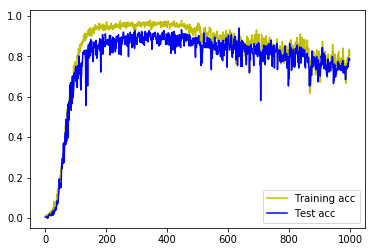

In [204]:
plt.plot(history.epoch, history.history.get('acc'), 'y', label='Training acc')
plt.plot(history.epoch, history.history.get('val_acc'), 'b', label='Test acc')
plt.legend()

In [206]:
max(history.history.get('acc'))

0.97843665768194066

In [207]:
max(history.history.get('val_acc'))

0.93951612903225812

# 总结与感想

模型的优化：每次的修正只改变一个方向(比如池化、网络容量)，不要多个方向一起变就不知道到底是谁把结果影响了。—— 如果模型效果有了提升，那下次修正就按更好的模型来，否则下次修正还是对上一次模型改变另一个方向。

- 模型拟合精度不够：增大网络容量 —— 1. 增多层；2. 增大每层的神经元数；
- 网络过拟合：各种地方加dropout层；
- 对测试数据预测精度不够：1. 增大网络容量，提高拟合精度的上限；2. 适当增加卷积核大小，增大每个卷积核的感受野！
- 最后的尝试：增加一些全连接层，提高“特征汇聚”能力（无新特征提取）。
- 更高级的优化方式：增加残差网络。

自己的感谢：
- 由上面的各种图发现，精度变化是“波动式”提升的，因此可以用“回调函数”实时监控训练，从而保存在所有epoch中的“val_loss”最小的那个模型参数/整个模型。—— 所以评判一个模型的好坏(epochs很多)，我们就应该看它、要它“val_loss”最小时的结果，作为它的效果评价标准（只要没有剧烈的波动）。
- 基本上模型调参，就上面那5条策略换着用；如果一开始“数据预处理”模型做的很好（都是按照合理的操作），那么后面的“模型优化”不会涉及前面的数据预处理。—— 以上策略适用于“Conv2D网络调优”；
- 最最最影响模型预测精度：1. 训练数据够不够（先对于类别总数来说）；2. 分类任务要划分的种类多不多（本问题划分的种类就太多了）！ 